In [60]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# Collect pollution csv data
file_to_load = "data/daily_la_airdata_epa.csv"

# Read pollution data file and store into pandas data frame
pollution_data = pd.read_csv(file_to_load)

# Check csv is being read and pull first 5 rows of data to 
# better understand what is contained within

pollution_data.head(10)

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2020,102,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
1,01/02/2020,72,PM2.5,Compton,06-037-1302,AQS
2,01/03/2020,87,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,01/04/2020,104,PM2.5,Compton,06-037-1302,AQS
4,01/05/2020,103,PM2.5,Compton,06-037-1302,AQS
5,01/06/2020,72,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
6,01/07/2020,49,NO2,Long Beach-Route 710 Near Road,06-037-4008,AQS
7,01/08/2020,59,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
8,01/09/2020,49,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
9,01/10/2020,66,PM2.5,Compton,06-037-1302,AQS


In [111]:
# Find what kind of datatype we have for each column.

pollution_data.dtypes

Date              object
 AQI Value         int64
Main Pollutant    object
Site Name         object
Site ID           object
Source            object
dtype: object

In [120]:
# Change the data type of the Date column to make it easier to plot
pollution_data['Date'] = pd.to_datetime(pollution_data['Date'], format='%m/%d/%Y')
pollution_data.head(5)

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,102,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
1,2020-01-02,72,PM2.5,Compton,06-037-1302,AQS
2,2020-01-03,87,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,2020-01-04,104,PM2.5,Compton,06-037-1302,AQS
4,2020-01-05,103,PM2.5,Compton,06-037-1302,AQS


In [12]:
# Sort AQI Value data highest to lowest
descending_aqi = pollution_data.sort_values(by=' AQI Value', ascending=False)
descending_aqi

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
248,09/05/2020,235,Ozone,Glendora,06-037-0016,AQS
186,07/05/2020,225,PM2.5,Los Angeles-North Main Street,06-037-1103,AQS
230,08/18/2020,222,Ozone,Glendora,06-037-0016,AQS
247,09/04/2020,220,Ozone,Glendora,06-037-0016,AQS
227,08/15/2020,220,Ozone,Glendora,06-037-0016,AQS
...,...,...,...,...,...,...
385,01/20/2021,38,PM2.5,Los Angeles-North Main Street,06-037-1103,AirNow
157,06/06/2020,38,PM2.5,North Hollywood (NOHO),06-037-4010,AQS
95,04/05/2020,37,Ozone,Pomona,06-037-1701,AQS
99,04/09/2020,35,Ozone,Reseda,06-037-1201,AQS


In [66]:
# Create a filtered data frame with AQI values higher than or equal to 150
unhealthy_aqi = descending_aqi[descending_aqi.iloc[:, 1]>=200]
unhealthy_aqi

# Wanted to sort by date after this but could not do so because the format in which dates is written, 
# does not follow the actual calendar. 

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
276,10/03/2020,210,Ozone,Reseda,06-037-1201,AQS
275,10/02/2020,204,Ozone,Reseda,06-037-1201,AQS
267,09/24/2020,201,Ozone,Santa Clarita,06-037-6012,AQS
249,09/06/2020,214,Ozone,Los Angeles-North Main Street,06-037-1103,AQS
248,09/05/2020,235,Ozone,Glendora,06-037-0016,AQS
247,09/04/2020,220,Ozone,Glendora,06-037-0016,AQS
246,09/03/2020,201,Ozone,Santa Clarita,06-037-6012,AQS
233,08/21/2020,200,Ozone,Lancaster-Division Street,06-037-9033,AirNow
232,08/20/2020,218,Ozone,Santa Clarita,06-037-6012,AQS
231,08/19/2020,217,Ozone,Glendora,06-037-0016,AQS


In [67]:
dates = unhealthy_aqi["Date"].unique
print(dates)

<bound method Series.unique of 276    10/03/2020
275    10/02/2020
267    09/24/2020
249    09/06/2020
248    09/05/2020
247    09/04/2020
246    09/03/2020
233    08/21/2020
232    08/20/2020
231    08/19/2020
230    08/18/2020
227    08/15/2020
226    08/14/2020
215    08/03/2020
191    07/10/2020
186    07/05/2020
127    05/07/2020
126    05/06/2020
Name: Date, dtype: object>


In [69]:
# Sort dates to be meaningful rather than by AQI value
dates_ascending_aqi = unhealthy_aqi.sort_values(by='Date', ascending=True)
dates_ascending_aqi

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
126,05/06/2020,206,Ozone,Glendora,06-037-0016,AQS
127,05/07/2020,203,Ozone,Pasadena,06-037-2005,AQS
186,07/05/2020,225,PM2.5,Los Angeles-North Main Street,06-037-1103,AQS
191,07/10/2020,204,Ozone,Glendora,06-037-0016,AQS
215,08/03/2020,200,Ozone,Santa Clarita,06-037-6012,AQS
226,08/14/2020,204,Ozone,Glendora,06-037-0016,AQS
227,08/15/2020,220,Ozone,Glendora,06-037-0016,AQS
230,08/18/2020,222,Ozone,Glendora,06-037-0016,AQS
231,08/19/2020,217,Ozone,Glendora,06-037-0016,AQS
232,08/20/2020,218,Ozone,Santa Clarita,06-037-6012,AQS


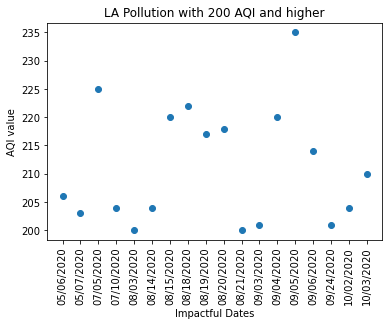

In [105]:
# Scatter plot of AQI higher than 200 AQI - Risk to Health is increased to everyone
x_value = dates_ascending_aqi["Date"]
y_value = dates_ascending_aqi[" AQI Value"]
plt.scatter(x_value, y_value)
plt.xlabel("Impactful Dates")
plt.ylabel("AQI value")
plt.title("LA Pollution with 200 AQI and higher")
plt.xticks(x_value, rotation=90)
plt.show()

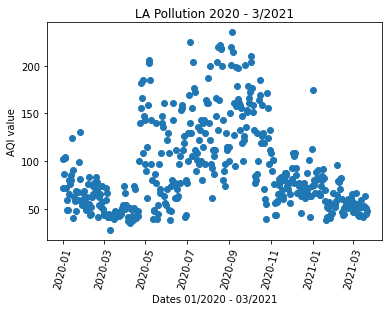

In [134]:
# Scatter plot of all dates Jan 2020 - March 2021 
x_value = pollution_data["Date"]
y_value = pollution_data[" AQI Value"]
plt.scatter(x_value, y_value)
plt.xticks(rotation=75)
plt.xlabel("Dates 01/2020 - 03/2021")
plt.ylabel("AQI value")
plt.title("LA Pollution 2020 - 3/2021")
plt.savefig("LA_pollution.png")
plt.show()

In [20]:
# Output file
output_data_file = "dates.csv"

# Export data to csv
unhealthy_aqi.to_csv("dates.csv", encoding="utf-8", header=True)

In [56]:
# Collect COVID cases in Los Angeles csv data
cdph_positive_test_rate = "data/datadesk-california-coronavirus-data/cdph-positive-test-rate.csv"

# Read pollution data file and store into pandas data frame
positive_covid_cases_data = pd.read_csv(cdph_positive_test_rate)

# Check csv is being read and pull first 5 rows of data to 
# better understand what is contained within
positive_covid_cases_data

,date,confirmed_cases,total_tests,new_confirmed_cases,new_tests,new_confirmed_cases_seven_day_total,new_tests_seven_day_total,positive_test_rate_seven_day_percent
0,2020-01-25,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,2,NaN,2.0,NaN,NaN,NaN,NaN
2,2020-01-27,2,NaN,0.0,NaN,NaN,NaN,NaN
3,2020-01-28,2,NaN,0.0,NaN,NaN,NaN,NaN
4,2020-01-29,2,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
412,2021-03-13,3523563,50889509.0,3230.0,240987.0,25985.0,1376681.0,0.018875
413,2021-03-14,3526335,51099687.0,2772.0,210178.0,24941.0,1453673.0,0.017157
414,2021-03-15,3528795,51263837.0,2460.0,164150.0,24143.0,1341338.0,0.017999
415,2021-03-16,3530055,51351366.0,1260.0,87529.0,22789.0,1211535.0,0.018810


In [135]:
# Display only the information to be referenced in the plot then rename column
seven_day_confirmed_cases = positive_covid_cases_data[['date', 'new_confirmed_cases_seven_day_total']]
new_covid_cases_renamed = seven_day_confirmed_cases.rename(columns={"new_confirmed_cases_seven_day_total": "7 Day New Cases"})

new_covid_cases_renamed

,date,7 Day New Cases
0,2020-01-25,NaN
1,2020-01-26,NaN
2,2020-01-27,NaN
3,2020-01-28,NaN
4,2020-01-29,NaN
...,...,...
412,2021-03-13,25985.0
413,2021-03-14,24941.0
414,2021-03-15,24143.0
415,2021-03-16,22789.0


In [127]:
# Reformat the date column to show datetime to facilitate the plotting
new_covid_cases_renamed['date'] = pd.to_datetime(new_covid_cases_renamed['date'], format='%Y/%m/%d')


,date,7 Day New Cases
0,2020-01-25,NaN
1,2020-01-26,NaN
2,2020-01-27,NaN
3,2020-01-28,NaN
4,2020-01-29,NaN


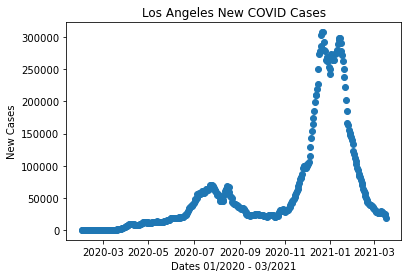

In [131]:
# Plot the number of new cases in Los Angeles area 
x_value = new_covid_cases_renamed["date"]
y_value = new_covid_cases_renamed["7 Day New Cases"]
plt.scatter(x_value, y_value)
plt.xlabel("Dates 01/2020 - 03/2021")
plt.ylabel("New Cases")
plt.title("Los Angeles New COVID Cases")
plt.savefig("LA_COVID_cases.png")
plt.show()